This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Clutter detection using the Gabella approach

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wradlib as wrl
import warnings

warnings.filterwarnings("ignore")
try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    plt.ion()
import numpy as np

### Read the data

In [2]:
filename = wrl.util.get_wradlib_data_file("misc/polar_dBZ_fbg.gz")
data = np.loadtxt(filename)
data = wrl.georef.create_xarray_dataarray(data, rf=0.001).wrl.georef.georeference()
data

<xarray.DataArray (azimuth: 360, range: 128)> Size: 369kB
array([[  7.01,   8.28,   5.46, ..., -10.  , -10.  , -10.  ],
       [  7.01,   7.01,   7.01, ..., -10.  , -10.  , -10.  ],
       [  7.01,   7.67,   5.46, ..., -10.  , -10.  , -10.  ],
       ...,
       [  7.01,   8.28,   5.46, ...,  14.87,  17.76,  15.51],
       [  7.67,   7.67,   5.46, ...,   0.64,   8.83,   4.53],
       [  8.83,   7.67,   4.53, ...,  -8.99,  -4.17,  -8.99]])
Coordinates: (12/14)
  * range       (range) float64 1kB 500.0 1.5e+03 ... 1.265e+05 1.275e+05
  * azimuth     (azimuth) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    elevation   (azimuth) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    longitude   float64 8B 0.0
    latitude    float64 8B 0.0
    altitude    float64 8B 0.0
    ...          ...
    y           (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    z           (azimuth, range) float64 369kB 0.0147 0.1323 ... 940.8 955.7
    gr          (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    rays        (azimuth, range) float64 369kB 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    crs_wkt     int64 8B 0

### Apply filter

In [3]:
clmap = data.wrl.classify.filter_gabella(
    wsize=5, thrsnorain=0.0, tr1=6.0, n_p=8, tr2=1.3
)
clmap

<xarray.DataArray 'filter_gabella' (azimuth: 360, range: 128)> Size: 46kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False]])
Coordinates: (12/14)
  * range       (range) float64 1kB 500.0 1.5e+03 ... 1.265e+05 1.275e+05
  * azimuth     (azimuth) float64 3kB 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
    elevation   (azimuth) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    longitude   float64 8B 0.0
    latitude    float64 8B 0.0
    altitude    float64 8B 0.0
    ...          ...
    y           (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    z           (azimuth, range) float64 369kB 0.0147 0.1323 ... 940.8 955.7
    gr          (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    rays        (azimuth, range) float64 369kB 0.5 0.5 0.5 ... 359.5 359.5 359.5
    bins        (azimuth, range) float64 369kB 500.0 1.5e+03 ... 1.275e+05
    crs_wkt     int64 8B 0

### Plot results

Text(0.5, 1.0, 'Cluttermap')

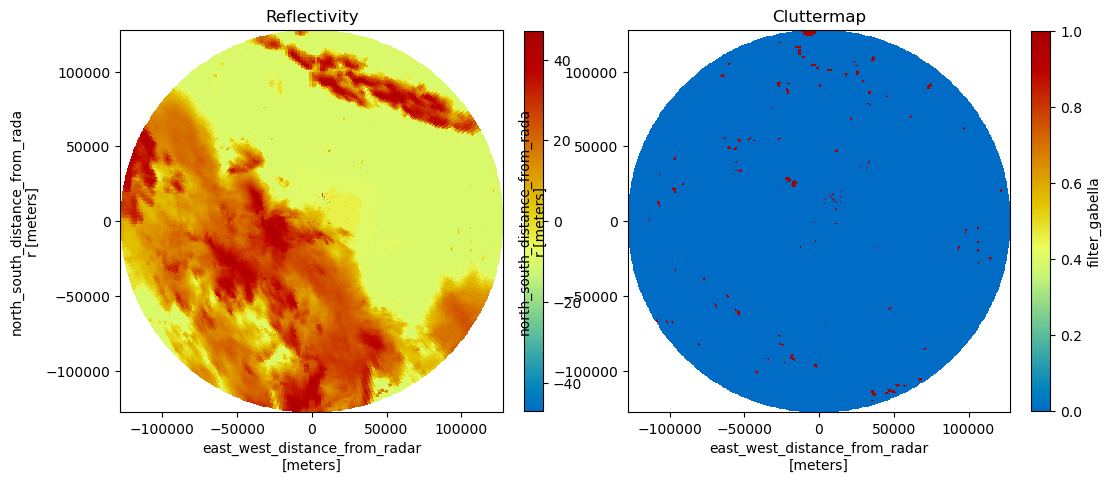

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(121)
pm = data.wrl.vis.plot(ax=ax1)
ax1.set_title("Reflectivity")
ax2 = fig.add_subplot(122)
pm = clmap.wrl.vis.plot(ax=ax2)
ax2.set_title("Cluttermap")